In [34]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
# Importing the datasets
s_2016_2018 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2016-2018_0.json')
s_2018 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2018_1.json')
s_2018_2019 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2018-2019_2.json')
s_2019_2020 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2019-2020_3.json')
s_2020_1 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2020_4.json')
s_2020_2 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2020_5.json')
s_2020_2021 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2020-2021_6.json')
s_2021_2022 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2021-2022_7.json')
s_2022 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2022_8.json')
s_2022_2023 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2022-2023_9.json')
s_2023_1 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2023_10.json')
s_2023_2 = pd.read_json(r'C:\Users\daraz\Desktop\BUas\Week 9-10 challenges block B\Spotify\streaming\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2023_11.json')

# Concatenating all the datasets
all_streaming = pd.concat([s_2016_2018, s_2018, s_2018_2019, s_2019_2020, s_2020_1, s_2020_2, s_2020_2021, s_2021_2022, s_2022, s_2022_2023, s_2023_1, s_2023_2], axis=0)

# Preprocessing

In [3]:
# Convert the ms_played column to seconds
all_streaming['ms_played'] = all_streaming['ms_played']/60000

# Renaming columns to make them clearer
all_streaming = all_streaming.rename(columns={'ms_played':'minutes_played', 'master_metadata_track_name':'track_name', 'master_metadata_album_artist_name':'artist_name',
                                          'master_metadata_album_album_name':'album_name'})

In [4]:
# Getting the total minutes listened
minutes_listened_overall = all_streaming['minutes_played'].sum()
minutes_listened_overall

459597.43783333333

In [5]:
# Turning the date column into a datetime object
all_streaming['ts'] = pd.to_datetime(all_streaming['ts'])

# Extracting date and time into separate columns
all_streaming['date'] = all_streaming['ts'].dt.date
all_streaming['time'] = all_streaming['ts'].dt.time

# Extracting information

In [6]:
# Creating a new dataframe with the interesting columns
interesting = all_streaming[['date', 'time', 'minutes_played', 'track_name', 'artist_name',
                             'album_name', 'reason_start', 'reason_end', 'skipped']]

# Getting the total minutes listened per song, ordered by most listened
print('Total minutes listened per song, ordered by most listened:')
interesting.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False).head(25)

Total minutes listened per song, ordered by most listened:


track_name
Amour plastique                          4488.323300
Roi                                      3357.148517
House Of Balloons / Glass Table Girls    2235.601717
En nuit                                  2132.884667
90210 (feat. Kacy Hill)                  2073.883200
Nouvelle-Orléans                         1987.182633
Wicked Games                             1900.726567
Euphories                                1866.593800
Enfance 80                               1764.041400
Wasted Times                             1727.098750
Pasadena                                 1629.149067
Tell Your Friends                        1581.545933
Suricate                                 1564.475217
I Feel It Coming                         1556.526067
Unforgettable                            1545.698367
COFFEE BEAN                              1531.765783
Low Life (feat. The Weeknd)              1476.201083
Try Me                                   1457.838150
Call Out My Name                   

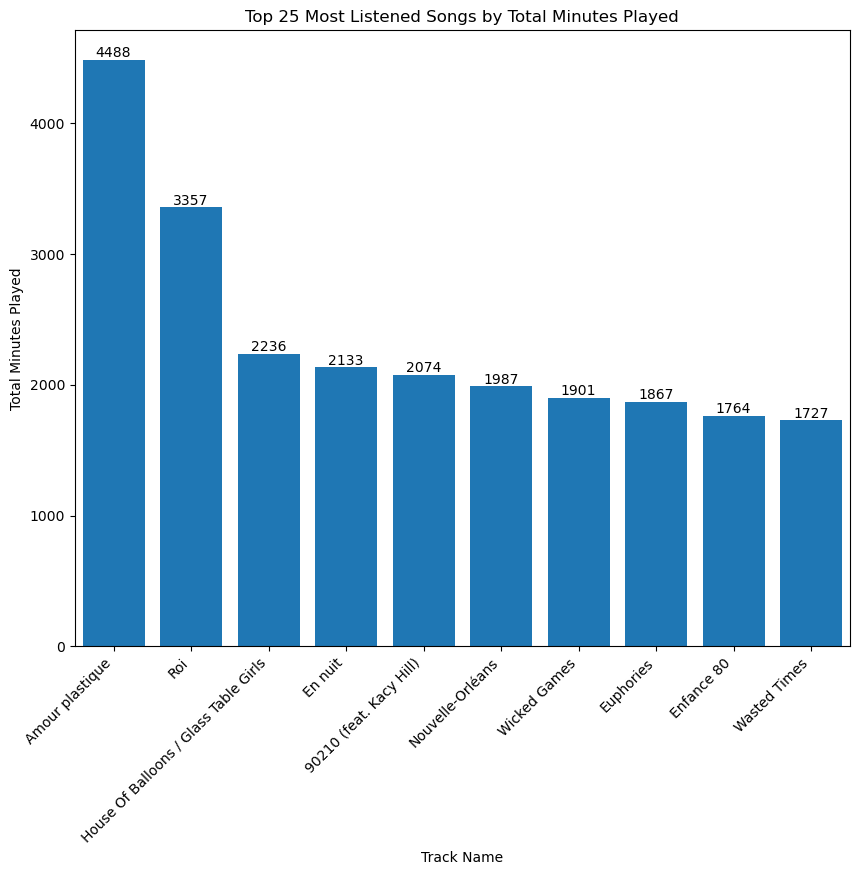

In [7]:
# Assuming 'interesting' is your DataFrame
total_minutes = interesting.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False).head(10)

# Creating the bar chart
plt.figure(figsize=(10, 8))  # Adjust the size of the plot as needed
total_minutes.plot(kind='bar')
plt.title('Top 25 Most Listened Songs by Total Minutes Played')
plt.xlabel('Track Name')
plt.ylabel('Total Minutes Played')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

bars = plt.bar(total_minutes.index, total_minutes.values)

# Adding the text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()

In [33]:
# Getting the total minutes listened per artist, ordered by most listened
print('Total minutes listened per artist, ordered by most listened:')
interesting.groupby('artist_name')['minutes_played'].sum().sort_values(ascending=False).head(25)

Total minutes listened per artist, ordered by most listened:


artist_name
The Weeknd           74743.101717
Travis Scott         21410.877133
Videoclub            20925.409200
Billie Eilish         9851.403283
La Femme              7044.622067
Drake                 6076.079867
Future                5504.799967
Harry Styles          5462.511950
21 Savage             5086.911483
Carson Coma           5071.676050
Elefánt               5019.111500
Red Bull Pilvaker     5014.280933
XXXTENTACION          4942.397600
Pop Smoke             4885.260883
Ed Sheeran            4227.174933
Huncho Jack           4150.451783
Kendrick Lamar        3978.142817
Kanye West            3416.752667
Post Malone           3347.028083
Major Lazer           3255.040667
Fluor                 3127.050383
Fiúk                  3125.418000
Metro Boomin          3045.690517
Krúbi                 3018.727117
Juice WRLD            2989.393683
Name: minutes_played, dtype: float64

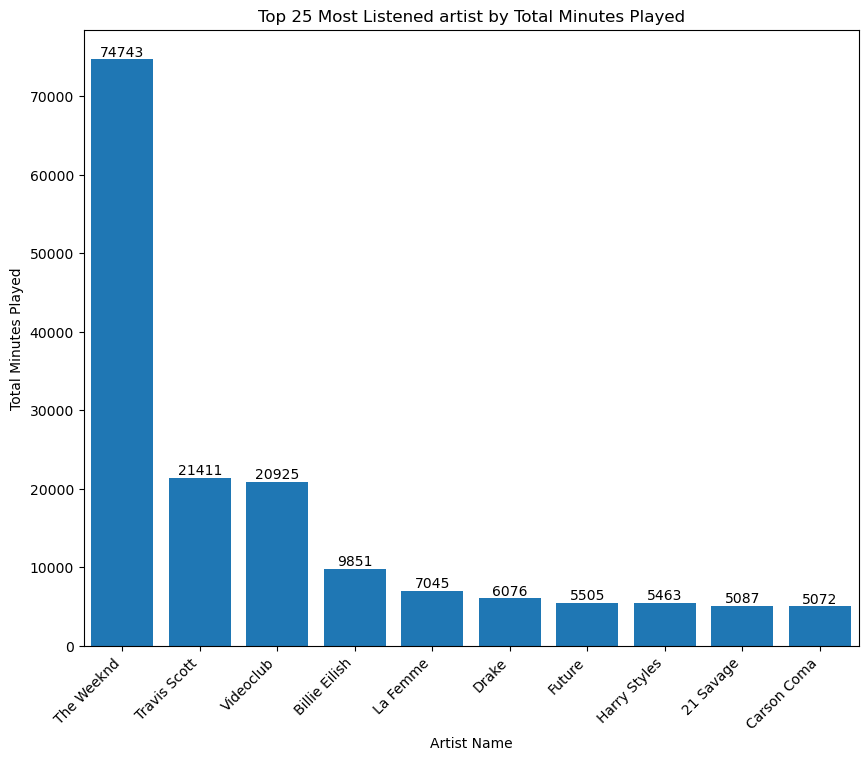

In [9]:
# Assuming 'interesting' is your DataFrame
total_minutes = interesting.groupby('artist_name')['minutes_played'].sum().sort_values(ascending=False).head(10)

# Creating the bar chart
plt.figure(figsize=(10, 8))  # Adjust the size of the plot as needed
total_minutes.plot(kind='bar')
plt.title('Top 25 Most Listened artist by Total Minutes Played')
plt.xlabel('Artist Name')
plt.ylabel('Total Minutes Played')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

bars = plt.bar(total_minutes.index, total_minutes.values)

# Adding the text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()

In [10]:
# Getting the total minutes listened per album, ordered by most listened
print('Total minutes listened per album, ordered by most listened:')
interesting.groupby('album_name')['minutes_played'].sum().sort_values(ascending=False).head(25)

Total minutes listened per album, ordered by most listened:


album_name
Trilogy                                                      21229.372967
Euphories                                                    17316.025333
ASTROWORLD                                                   13562.608100
Starboy                                                      10078.902867
Beauty Behind The Madness                                     8671.440800
After Hours                                                   8038.965733
My Dear Melancholy,                                           7798.570817
Kiss Land                                                     6415.265717
Paradigmes                                                    5306.849817
Spider-Man: Into the Spider-Verse                             5198.771950
WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?                      4304.232717
Huncho Jack, Jack Huncho                                      4150.451783
Rodeo                                                         4033.790567
Lesz, ami lesz             

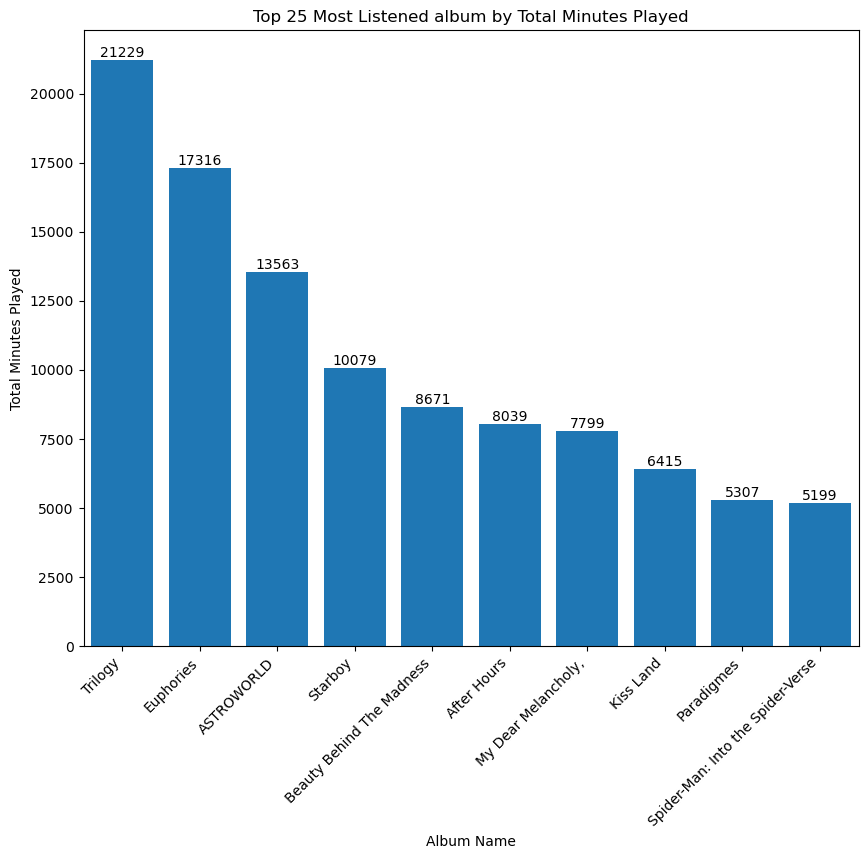

In [11]:
# Assuming 'interesting' is your DataFrame
total_minutes = interesting.groupby('album_name')['minutes_played'].sum().sort_values(ascending=False).head(10)

# Creating the bar chart
plt.figure(figsize=(10, 8))  # Adjust the size of the plot as needed
total_minutes.plot(kind='bar')
plt.title('Top 25 Most Listened album by Total Minutes Played')
plt.xlabel('Album Name')
plt.ylabel('Total Minutes Played')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

bars = plt.bar(total_minutes.index, total_minutes.values)

# Adding the text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')


plt.show()

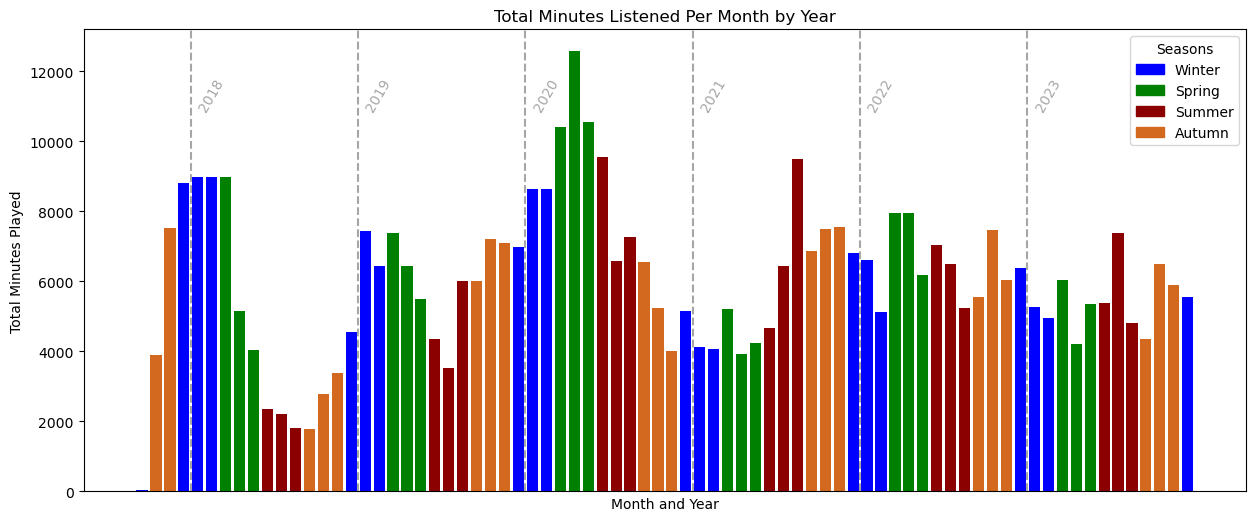

In [12]:
# Creating a copy of the dataframe
interesting_copy = interesting.copy()

# Turning the date column into a datetime object and creating new columns for year and month
interesting_copy['date'] = pd.to_datetime(interesting_copy['date'])
interesting_copy['year'] = interesting_copy['date'].dt.year
interesting_copy['month'] = interesting_copy['date'].dt.month

# Group by year and month and sum the minutes played
monthly_minutes = interesting_copy.groupby(['year', 'month'])['minutes_played'].sum()

# Define colors for each season
season_colors = {
    1: 'blue', 2: 'blue', 12: 'blue',  # Winter months
    3: 'green', 4: 'green', 5: 'green',  # Spring months
    6: 'darkred', 7: 'darkred', 8: 'darkred',  # Summer months
    9: 'chocolate', 10: 'chocolate', 11: 'chocolate'  # Autumn months
}

# Define legend for seasons
season_legend = {
    'Winter': 'blue',
    'Spring': 'green',
    'Summer': 'darkred',
    'Autumn': 'chocolate'
}

# Plotting
plt.figure(figsize=(15, 6))

x_labels = []
x_positions = []

for year in sorted(interesting_copy['year'].unique()):
    year_data = monthly_minutes.xs(year, level='year')
    colors = [season_colors[month] for month in year_data.index]
    month_year_labels = [f'{calendar.month_abbr[month]} {year}' for month in year_data.index]
    x_labels.extend(month_year_labels)
    x_positions.extend(range(len(x_labels)-len(month_year_labels), len(x_labels)))
    plt.bar(month_year_labels, year_data.values, color=colors, label=f'{year}')

# Add vertical lines and year labels
for i, label in enumerate(x_labels):
    if label.startswith('Dec') and i < len(x_labels) - 1:
        line_position = i + 0.5
        plt.axvline(x=line_position, color='grey', linestyle='--', alpha=0.7)
        # Add the year label
        if line_position < len(x_labels):  # Ensure the label is within the plot range
            plt.text(line_position + 0.4, plt.gca().get_ylim()[1] * 0.9, str(int(label.split()[1]) + 1),
                     rotation=60, verticalalignment='top', color='grey', alpha=0.7)

season_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in season_legend.values()]
plt.legend(season_patches, season_legend.keys(), title='Seasons')

plt.title('Total Minutes Listened Per Month by Year')
plt.xlabel('Month and Year')
plt.ylabel('Total Minutes Played')
plt.xticks([])
plt.show()

# CHECK HOW MUCH TIME YOU SPENT LISTENING TO MUSIC PER DAY OF THE WEEK
# CHECK HOW MUCH TIME YOU SPENT LISTENING TO MUSIC PER HOUR OF THE DAY
# CHECK HOW MUCH TIME YOU SPENT LISTENING TO MUSIC PER DAY OF THE MONTH
# CHECK HOW BIG OF A PART IS EACH SEASON IN EACH YEAR
# CHECK WHO WAS THE MOST LISTENED ARTIST PER MONTH

# Checking who was the most listened artist per month

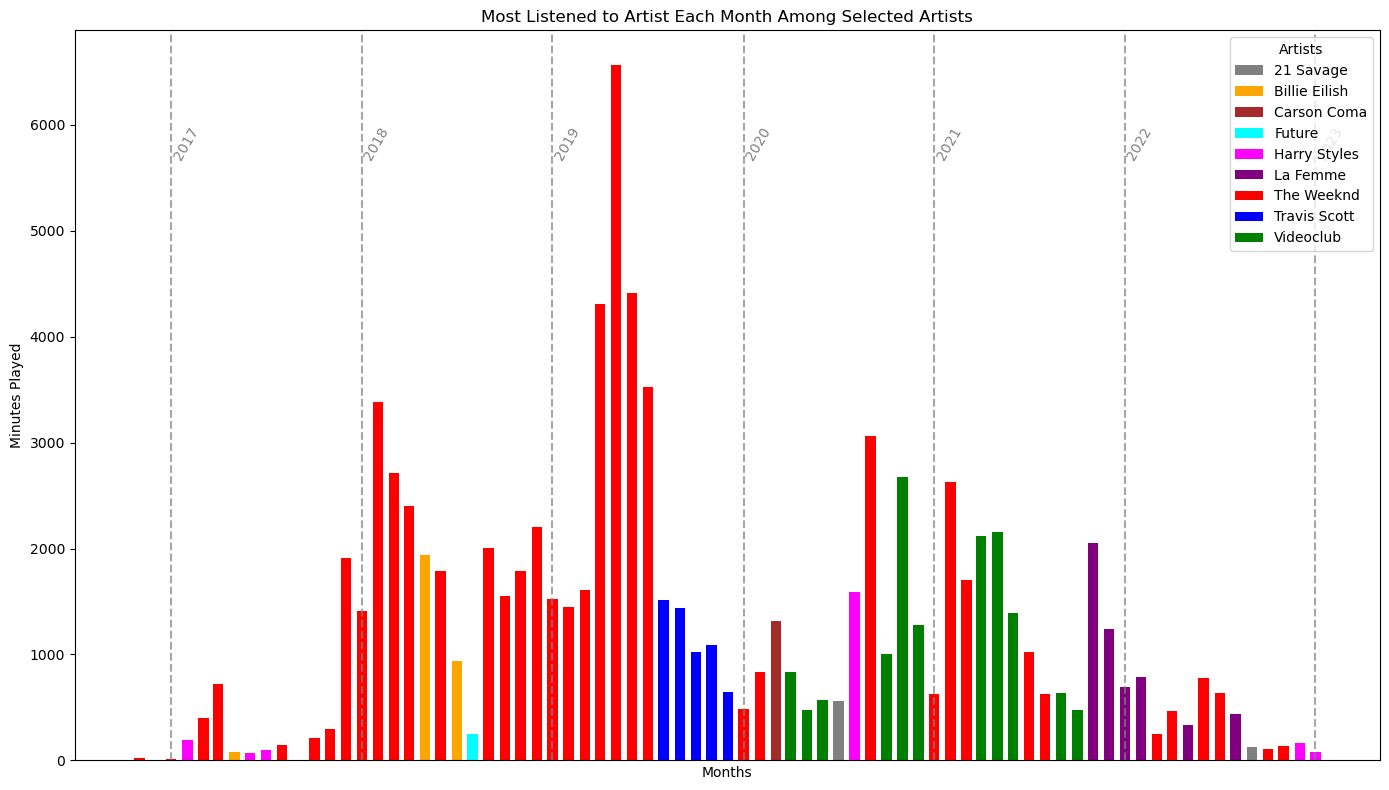

artist_name,21 Savage,Billie Eilish,Carson Coma,Future,Harry Styles,La Femme,The Weeknd,Travis Scott,Videoclub
Year-Month,,,,,,,,,
2017-10-01,0.000000,0.0,0.0,0.0,0.000000,0.0,19.147733,0.0,0.0
2017-12-01,0.000000,0.0,0.0,0.0,0.000000,0.0,9.261067,0.0,0.0
2018-01-01,0.000000,0.0,0.0,0.0,192.439400,0.0,0.000000,0.0,0.0
2018-02-01,0.000000,0.0,0.0,0.0,0.000000,0.0,400.456000,0.0,0.0
2018-03-01,0.000000,0.0,0.0,0.0,0.000000,0.0,720.201883,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2023-08-01,128.478467,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2023-09-01,0.000000,0.0,0.0,0.0,0.000000,0.0,103.835600,0.0,0.0
2023-10-01,0.000000,0.0,0.0,0.0,0.000000,0.0,139.558000,0.0,0.0


In [114]:
# Initial setup and data preparation
interesting_copy = interesting.copy()

# Convert 'date' to datetime object
interesting_copy['date'] = pd.to_datetime(interesting_copy['date'])

# Extract year and month
interesting_copy['year'] = interesting_copy['date'].dt.year
interesting_copy['month'] = interesting_copy['date'].dt.month

# Group by year, month, and artist name and sum up minutes
monthly_artist_listens = interesting_copy.groupby(['year', 'month', 'artist_name'])['minutes_played'].sum().reset_index()

# Specify the artists to focus on
artists_to_plot = [
    "The Weeknd",
    "Travis Scott",
    "Videoclub",
    "Billie Eilish",
    "La Femme",
    "Drake",
    "Future",
    "Harry Styles",
    "21 Savage",
    "Carson Coma"
]

# Filter the DataFrame to only include the specified artists
filtered_artists = monthly_artist_listens[monthly_artist_listens['artist_name'].isin(artists_to_plot)]

# Find the top artist for each month among the specified artists
def top_artist(group):
    return group.nlargest(1, 'minutes_played')

top_artist_each_month = filtered_artists.groupby(['year', 'month']).apply(top_artist).reset_index(drop=True)

# Create a "Year-Month" column for plotting
top_artist_each_month['Year-Month'] = pd.to_datetime(top_artist_each_month['year'].astype(str) + '-' + top_artist_each_month['month'].astype(str))

# Pivot the data for plotting
pivot_df = top_artist_each_month.pivot(index='Year-Month', columns='artist_name', values='minutes_played').fillna(0)

# Plot as a bar chart
plt.figure(figsize=(14, 8))

# Plot each artist with a different bar color
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'cyan', 'magenta', 'grey', 'brown']
artist_colors = dict(zip(artists_to_plot, colors))

for artist in pivot_df.columns:
    # Extracting the non-zero values for each artist
    non_zero_values = pivot_df[artist][pivot_df[artist] > 0]
    plt.bar(non_zero_values.index, non_zero_values, label=artist, color=artist_colors.get(artist), width=20)

plt.title('Most Listened to Artist Each Month Among Selected Artists')
plt.xlabel('Months')
plt.ylabel('Minutes Played')
plt.legend(title='Artists')
plt.xticks([])

# Adding vertical lines at the end of each year with year labels
for year in pivot_df.index.year.unique():
    december_date = pd.Timestamp(year, 12, 1)
    plt.axvline(x=december_date, color='gray', linestyle='--', alpha=0.7)
    plt.text(december_date, 6000, str(year), rotation=60, verticalalignment='top', color='gray', fontsize=10)

plt.tight_layout()  # Adjust layout for better readability
plt.show()

pivot_df

In [ ]:
'''# Step 3: For each month, find the top 5 artists by minutes played
sorted = monthly_artist_listens.sort_values(ascending=False, inplace=True)



tops = sorted.head(5, 'minutes_played')

top_artists_monthly = tops.groupby(['year', 'month'])

top_artists_monthly'''